<a href="https://colab.research.google.com/github/ash827/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Ashley_Eddings_LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random  # This generates random data
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
import numpy as np
np.random.normal(10,2)

8.51923546199181

In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  #time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4*60, 3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500) # The .1 means 1% here
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  #time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5*60, 2*60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
users[:10] # this is without the print() 

[User(purchased=False, time_on_site=507.6178615349775, mobile=True),
 User(purchased=True, time_on_site=458.3079778198552, mobile=True),
 User(purchased=False, time_on_site=280.905579707811, mobile=True),
 User(purchased=True, time_on_site=428.9761229953469, mobile=True),
 User(purchased=True, time_on_site=480.1400044595284, mobile=True),
 User(purchased=True, time_on_site=672.3145410236309, mobile=True),
 User(purchased=False, time_on_site=340.4304073189052, mobile=False),
 User(purchased=True, time_on_site=544.7858197843748, mobile=True),
 User(purchased=True, time_on_site=400.8169742543697, mobile=True),
 User(purchased=True, time_on_site=485.0310694347269, mobile=True)]

In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,507.617862,True
1,True,458.307978,True
2,False,280.905580,True
3,True,428.976123,True
4,True,480.140004,True


In [0]:
user_data['time_on_site_min'] = user_data['time_on_site'] / 60
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,False,507.617862,True,8.460298
1,True,458.307978,True,7.638466
2,False,280.905580,True,4.681760
3,True,428.976123,True,7.149602
4,True,480.140004,True,8.002333


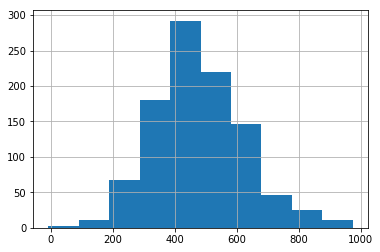

In [0]:
user_data.time_on_site.hist(); # This should be more of a bell curve #with the random.normal
#code it bell curves!

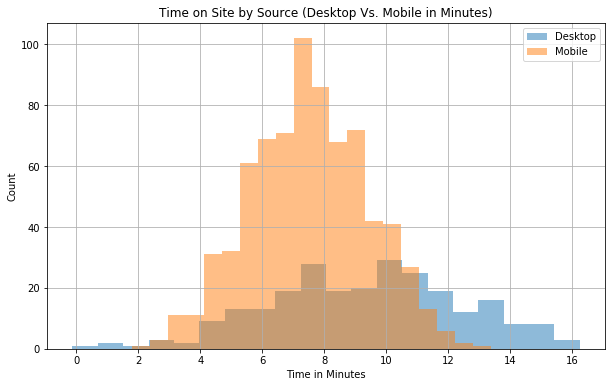

In [0]:
import matplotlib.pyplot as plt

user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5,figsize=(10,6))
plt.title('Time on Site by Source (Desktop Vs. Mobile in Minutes)')
plt.ylabel('Count')
plt.xlabel('Time in Minutes')
plt.legend(['Desktop', 'Mobile'])

In [0]:
user_data[user_data.time_on_site < 0.0]

,purchased,time_on_site,mobile,time_on_site_min
342,False,-7.397405,False,-0.12329


In [0]:
user_data.loc[user_data['time_on_site'] < 0.0, 'time_on_site']
user_data[user_data.time_on_site < 0.0]

,purchased,time_on_site,mobile,time_on_site_min
342,False,-7.397405,False,-0.12329


In [0]:
#pd.crosstab()

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,-7.3974045081567965,61.54692435483844,87.26436173976646,108.14587893411493,117.4997372268337,163.3924478720018,166.2495366306262,169.243607195388,171.51692960164502,172.11295410288432,184.38848737753938,187.0250373930919,187.0391090262196,187.2013600029569,194.35417577577408,196.8546899892962,198.6311247619845,202.1193308960942,203.85792312251093,204.41999977430493,204.59967231896155,208.07767540030534,211.7863065441136,212.72730194988395,218.54004758231403,228.2864843418055,231.68444275459402,233.68329368516916,236.61018356253632,237.17194774519842,238.45880264893162,238.92257754514804,239.9951351395082,241.78018104278877,243.34080487994112,243.40035385507042,243.4498358530195,243.66641690561636,247.3518406114149,247.58364517711027,...,761.6857222898375,765.9379735433745,766.4161951239005,770.0262652363057,781.1519195551643,781.9624684215223,782.0244230732205,783.9027547481763,785.4113511445989,789.9533956993383,796.7649248395835,801.1158433878973,801.9447802939721,802.5230438385911,808.1441555782988,808.9828860867592,811.6960233851934,820.7341829852935,823.3125128389627,824.6921705129079,825.2744107854484,831.8532525474232,835.0647971728971,837.4430392799125,840.3034698722606,840.5793124373106,844.0931429510168,855.3006109073245,872.6818226205457,897.1896202807768,897.4758355549188,901.3887240738327,902.5934759921705,904.5917860810926,908.7226479034132,915.0409367483038,920.874863744992,927.4637833578108,931.6792430789271,974.2591416820268
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
True,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0,...,1,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'])

purchased,False,True
time_on_site,,
"(-8.379, 188.934]",11,3
"(188.934, 385.265]",136,111
"(385.265, 581.597]",206,305
"(581.597, 777.928]",78,114
"(777.928, 974.259]",11,25


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site,,
"(-8.379, 188.934]",0.024887,0.005376
"(188.934, 385.265]",0.307692,0.198925
"(385.265, 581.597]",0.466063,0.546595
"(581.597, 777.928]",0.176471,0.204301
"(777.928, 974.259]",0.024887,0.044803


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.548,0.406667
True,0.452,0.593333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')


purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(-8.379, 188.934]   0.051095  0.013115  0.000000  0.006742
(188.934, 385.265]  0.226277  0.344262  0.053097  0.235955
(385.265, 581.597]  0.335766  0.524590  0.353982  0.595506
(581.597, 777.928]  0.313869  0.114754  0.371681  0.161798
(777.928, 974.259]  0.072993  0.003279  0.221239  0.000000

## Stanford Open Police Project

In [0]:
!unzip tr137st9964_fl_saint_petersburg_2019_02_25.csv.zip
!ls

Archive:  tr137st9964_fl_saint_petersburg_2019_02_25.csv.zip
  inflating: share/data/opp-for-archive/fl_saint_petersburg_2019_02_25.csv  
sample_data  share  tr137st9964_fl_saint_petersburg_2019_02_25.csv.zip


In [0]:
import pandas as pd
df = pd.read_csv('./share/data/opp-for-archive/fl_saint_petersburg_2019_02_25.csv')
print(df.shape)
df.head(10)

(16383, 9)


,raw_row_number,date,time,location,lat,lng,district,officer_id_hash,type
0,1,2010-01-01,00:09:00,"11TH ST N / 9TH AV N, ST PETERSBURG, FL, 33705",27.781481,-82.649002,2.0,ffc43f9661,vehicular
1,2,2010-01-01,00:15:00,"200 CATALAN BLVD NE, ST PETERSBURG, FL, 33704",27.793578,-82.615655,2.0,d2e24887fc,vehicular
2,3,2010-01-01,00:56:00,"34TH ST S / 50TH AV S, ST PETERSBURG, FL, 33711",27.722285,-82.679295,1.0,682937c0e1,vehicular
3,4,2010-01-01,01:15:00,ARLINGTON AV N / DR MARTIN LUTHER KING JR ST N...,NaN,NaN,2.0,1ee7764e96,vehicular
4,5,2010-01-01,01:24:00,"4TH ST N / NW MADISON CIR N, ST PETERSBURG, FL...",27.830700,-82.638814,2.0,1c66f1a5de,vehicular
5,6,2010-01-01,02:33:00,"14TH AV N / 49TH ST N, ST PETERSBURG, FL, 33710",27.972389,-82.402611,3.0,5f7f942c38,vehicular
6,7,2010-01-01,02:51:00,"4TH ST N / 76TH AV N, ST PETERSBURG, FL, 33702",27.841873,-82.641516,2.0,6d46ab4bb7,vehicular
7,8,2010-01-01,04:37:00,"BRIGHTON BAY BLVD NE / GANDY BLVD, ST PETERSBU...",27.871667,-82.624427,NaN,9473f72d9a,vehicular
8,9,2010-01-01,05:19:00,"38TH AV N / 59TH ST N, ST PETERSBURG, FL, 33709",NaN,NaN,3.0,2ced7cb50d,vehicular
9,10,2010-01-01,06:09:00,"31ST AV N / 66TH WAY N, ST PETERSBURG, FL, 33710",27.864705,-82.735825,3.0,8f610ef45a,vehicular


In [0]:
df.isna().sum()

raw_row_number        0
date                  0
time                  0
location              0
lat                1681
lng                1681
district            269
officer_id_hash       0
type                  0
dtype: int64

In [0]:
df.lat.value_counts()

27.716451    286
27.792435    283
27.867542    218
27.768863    193
27.717520    156
27.821645    139
27.713709    134
27.755407    121
27.862593    103
27.751920     98
27.776869     97
27.766178     89
27.770130     87
27.790790     86
27.812098     79
27.752079     76
27.788756     75
27.766141     74
27.807973     72
27.717665     70
27.767996     68
27.792252     62
27.772807     60
27.748310     60
27.808607     59
27.748320     57
27.770330     56
27.793787     55
27.728763     55
27.759170     53
            ... 
27.737345      1
27.776846      1
27.754147      1
27.777733      1
27.757971      1
27.719705      1
27.799272      1
27.793102      1
27.747699      1
27.749370      1
27.719372      1
27.794833      1
27.802715      1
27.803467      1
27.795741      1
27.889665      1
27.768395      1
27.705475      1
27.788170      1
27.776462      1
27.808794      1
27.755632      1
27.818244      1
27.757077      1
27.791630      1
27.799505      1
27.748729      1
27.877536     

In [0]:
df.location.value_counts(normalize=True).head(10)

# %%time tells you how long it takes to load the data

PINELLAS BAYWAY E-W / PINELLAS BAYWAY N-S S, ST PETERSBURG, FL, 33715    0.017457
4TH ST N / GANDY BLVD, ST PETERSBURG, FL, 33702                          0.013306
31ST ST S / 54TH AV S, ST PETERSBURG, FL, 33712                          0.009522
PINELLAS BAYWAY E-W / SUN BLVD, ST PETERSBURG, FL, 33715                 0.008179
1ST AV S / 22ND ST S, ST PETERSBURG, FL, 33712                           0.006592
4TH ST N / 99TH AV N, ST PETERSBURG, FL, 33702                           0.006226
22ND AV S / 34TH ST S, ST PETERSBURG, FL, 33711                          0.006043
18TH AV S / 34TH ST S, ST PETERSBURG, FL, 33711                          0.005982
22ND AV N / 34TH ST N, ST PETERSBURG, FL, 33713                          0.005616
1ST AV S / 20TH ST S, ST PETERSBURG, FL, 33712                           0.005432
Name: location, dtype: float64

In [0]:
# Specify a dataframe by creating it yourself
import numpy as np
df = pd.DataFrame({'a': np.arange(1e6),
                 'b': 2*np.arange(1e6)})
print(df.shape)
df.head()

(1000000, 2)


,a,b
0,0.0,0.0
1,1.0,2.0
2,2.0,4.0
3,3.0,6.0
4,4.0,8.0


In [0]:
%timeit df['c'] = df['a']**2  # we squared 'a' here

100 loops, best of 3: 14.8 ms per loop


In [0]:
%timeit df['c2'] = df['a'].apply(lambda x: x**2)

1 loop, best of 3: 320 ms per loop


In [0]:
df.head()

,a,b,c
0,0.0,0.0,0.0
1,1.0,2.0,1.0
2,2.0,4.0,4.0
3,3.0,6.0,9.0
4,4.0,8.0,16.0


## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
df = pd.read_csv('https://raw.githubusercontent.com/ash827/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
print(df.shape)
df.head(10)

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [0]:
df.isna().sum() # making sure we don't have any NaN values

Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64

In [0]:
df.count() # this was just an extra step since we know there are 1200 anyway. Just wanted to keep practicing.

Unnamed: 0       1200
age              1200
weight           1200
exercise_time    1200
dtype: int64

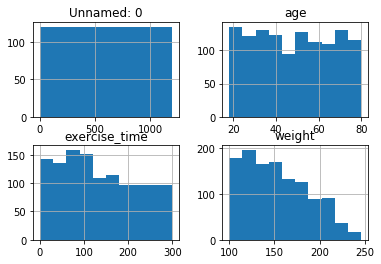

In [0]:
df.hist();  # What the heck

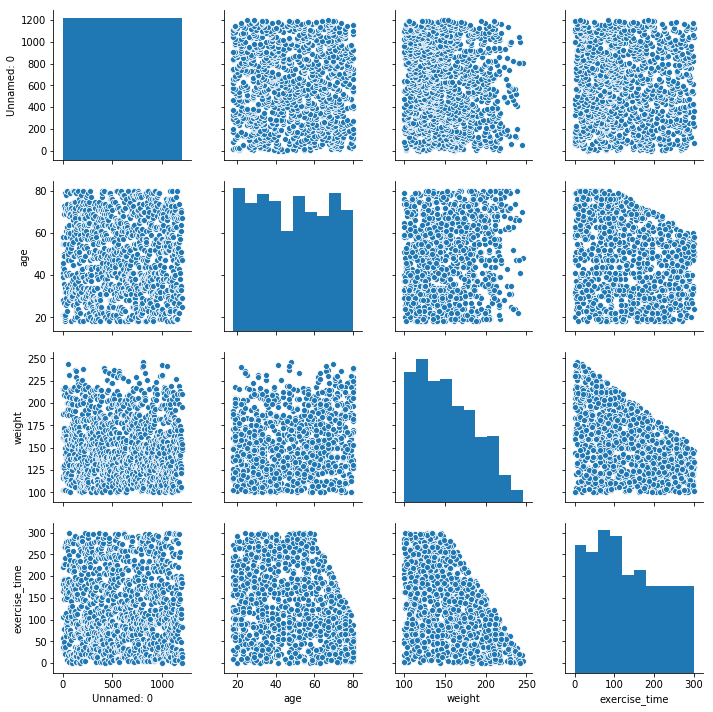

In [0]:
import seaborn as sns
sns.pairplot(df);   # The pairplot doesn't seem to be very helpful

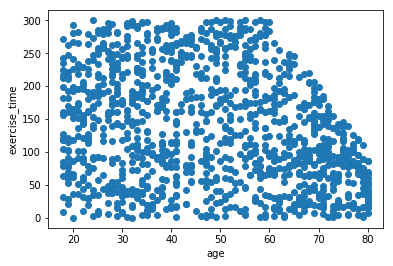

In [0]:
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['exercise_time'])
plt.xlabel('age')
plt.ylabel('exercise_time')
plt.show()   

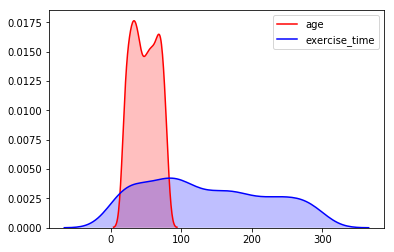

In [0]:
p1=sns.kdeplot(df['age'], shade=True, color="r")
p1=sns.kdeplot(df['exercise_time'], shade=True, color="b")

In [0]:
pd.crosstab(df['exercise_time'], df['age'])

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
exercise_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [0]:
time_bins = pd.cut(df['age'], 10)  
pd.crosstab(time_bins, df['exercise_time'])

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(17.938, 24.2]",1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,3,1,2,0,0,0,1,1,1,0,0,0,...,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
"(24.2, 30.4]",0,0,0,1,0,0,2,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,1,1,0,0,2,0,2,...,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0
"(30.4, 36.6]",1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,2,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,4,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1,1,0,2,2,1,1,0
"(36.6, 42.8]",0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,3,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,2,0,1,0,0,0,...,0,0,1,2,0,2,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,4,0,0,1,1,0,1,0,0,0,0
"(42.8, 49.0]",0,1,1,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,0,1,0,1,0,1,0,2,0,1,1,1,0,2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1
"(49.0, 55.2]",0,0,0,1,0,1,1,0,0,0,1,0,0,2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,3,0,0,0,0,0,1,0,1,2,2,1,1,0,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,2
"(55.2, 61.4]",0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,1,0,1,0,1,0,2,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0,2,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,3,0,1
"(61.4, 67.6]",0,1,0,1,1,1,0,0,0,0,3,0,0,0,2,0,0,2,1,1,0,2,1,0,1,0,1,1,0,0,3,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(67.6, 73.8]",0,0,3,0,0,0,1,0,2,0,0,0,1,0,0,1,1,0,2,0,1,4,0,0,0,1,0,0,2,2,1,0,0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


### 1.)It looks like the older someone gets, the less their exercise time equals, which makes sense. This is also true with age vs. exercise time. 2.) The relationship between age and exercise time show seem to look spurious when you look at the density plot, but in all actuality, it shows that the older you get, the less you exercise. 3.) I would say again that the age and exercise time, and weight and exercise time are real, and the unnamed column is spurious with any of the other coloumns. It doesn't help with the data. 

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)